# Importing Data Section
## The csv data used below is 2015 loans and is available [here](https://www.lendingclub.com/info/download-data.action )

In [28]:
#importing pandas to help with importing data set
import pandas as pd
#this is to set the max output for columns
#pd.options.display.max_columns = 999 
#this is to set the max output for rows
#pd.options.display.max_rows
#importing pi lab
import pylab as pl
#this is a bug fix for using Jupyter
%matplotlib inline

In [2]:
#importing pandas stats library 
import statsmodels.formula.api as sm

In [3]:
# using the pandas read csv function to pull in my data this is my panda dataframe
## using parens to call the function with parameters, and quotes for the string.
###The last 4 rows in my data set are not necessary, and I ned to drop them along with my first row. 
lc_test = pd.read_csv(filepath_or_buffer="/Users/z013mbn/Desktop/LC_Test.csv",skiprows=0, skipfooter=4, header=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [4]:
#check to make sure my data set is correct
pd.options.display.max_columns = 999 
pd.options.display.max_rows = 10 
lc_test

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,15000,15000,15000,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-14,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,Aug-94,0,NaN,NaN,6,0,138008,29%,17,w,0.00,0.00,17392.370000,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-16,12017.81,NaN,Nov-17,0,NaN,1,Individual,NaN,NaN,NaN,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828.0,9525.0,4.7,0,0,103.0,244,1,1,0,47.0,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0.0,0,0,4,100.0,0.0,0,0,196500,149140,10000,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-14,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0,Sep-89,2,42.0,NaN,17,0,6133,31.60%,36,w,0.00,0.00,6611.690000,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-16,321.08,NaN,Feb-17,0,59.0,1,Individual,NaN,NaN,NaN,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536.0,7599.0,41.5,0,0,76.0,290,1,1,1,5.0,42.0,1.0,42.0,4,6,9,7,18,2,14,32,9,17,0.0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12800,12800,12800,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000.0,Verified,Dec-14,In Grace Period,n,NaN,NaN,car,Car financing,953xx,CA,8.31,1,Oct-00,0,17.0,NaN,8,0,5753,100.90%,13,w,6223.57,6223.57,11845.830000,11845.83,6576.43,5269.40,0.0,0.00,0.0000,Feb-18,31

In [5]:
# Put the PD options back to normal
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 60 

In [6]:
#look at the descriptive statistics for our variables
lc_test.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,235629.000000,235629.000000,235629.000000,235629,235629,235629.000000,235629,235629,...,383.000000,383.000000,235629,235629,3403,3403,3403,3403.000000,3403.000000,3403.000000
unique,NaN,NaN,NaN,NaN,NaN,2,89,NaN,7,35,...,NaN,NaN,1,2,42,3,44,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,12.99%,NaN,C,C2,...,NaN,NaN,Cash,N,Jan-18,COMPLETE,Apr-17,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,162570,12630,NaN,66565,13965,...,NaN,NaN,235629,232226,297,1705,234,NaN,NaN,NaN
mean,NaN,NaN,14870.156793,14870.156793,14865.334169,NaN,NaN,442.458886,NaN,NaN,...,8786.366266,203.231749,NaN,NaN,NaN,NaN,NaN,4680.985436,47.134543,8.324126
std,NaN,NaN,8438.318193,8438.318193,8435.524995,NaN,NaN,245.043498,NaN,NaN,...,4843.283983,154.861779,NaN,NaN,NaN,NaN,NaN,3443.862541,10.768565,8.493756
min,NaN,NaN,1000.000000,1000.000000,950.000000,NaN,NaN,23.360000,NaN,NaN,...,174.150000,0.040000,NaN,NaN,NaN,NaN,NaN,44.210000,0.550000,0.000000
25%,NaN,NaN,8325.000000,8325.000000,8325.000000,NaN,NaN,265.680000,NaN,NaN,...,5152.350000,76.945000,NaN,NaN,NaN,NaN,NaN,2077.955000,45.000000,0.000000
50%,NaN,NaN,13000.000000,13000.000000,13000.000000,NaN,NaN,384.060000,NaN,NaN,...,8291.850000,181.210000,NaN,NaN,NaN,NaN,NaN,3954.080000,45.000000,6.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,NaN,NaN,578.690000,NaN,NaN,...,12125.800000,291.805000,NaN,NaN,NaN,NaN,NaN,6398.050000,50.000000,15.000000


## Searching for correlative variables with my predictor variable loan_status 
## Click here to get a mild description of the loan_status definition, they are not very clear :( https://www.lendingclub.com/info/demand-and-credit-profile.action


In [7]:
#We need to clean up the data set to create a 1 for fully paid off or 0 if not 
lc_clean = pd.get_dummies(lc_test, prefix=None, prefix_sep='_', dummy_na=False, columns=["loan_status", "grade"], sparse=False, drop_first=False)

In [8]:
#inspect the columns 
lc_clean.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                                 int64
term                                           object
int_rate                                       object
installment                                   float64
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
pymnt_plan                                     object
url                                           float64
desc                                           object
purpose                     

In [9]:
#renaming the columns I want to get a correlation for
##https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas 
lc_clean = lc_clean.rename(columns={'loan_status_Fully Paid': 'loan_status_fully_paid',
                                    'loan_status_In Grace Period': 'loan_status_In_Grace_Period',
                                    'loan_status_Charged Off': 'loan_status_Charged_Off',
                                    'loan_status_Late (16-30 days)': 'loan_status_Late_(16-30 days)',
                                    'loan_status_Late (31-120 days)': 'loan_status_Late_(31-120 days)'})

In [10]:
pd.options.display.max_rows = 200
lc_clean.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                                 int64
term                                           object
int_rate                                       object
installment                                   float64
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
pymnt_plan                                     object
url                                           float64
desc                                           object
purpose                     

In [11]:
#creating a subset of the data to analyze the stats behind loan_status. 
##Please troubleshoot this with Greg in regard to loan_status_In Grace Period  variable 
loan_status = lc_clean[['loan_status_Charged_Off',
                        'loan_status_In_Grace_Period',
                        'loan_amnt', 'loan_status_Current',
                        'loan_status_Default',
                        'loan_status_fully_paid',
                        'loan_status_Late_(16-30 days)',
                        'loan_status_Late_(31-120 days)']]
loan_status.describe(include='all')

,loan_status_Charged_Off,loan_status_In_Grace_Period,loan_amnt,loan_status_Current,loan_status_Default,loan_status_fully_paid,loan_status_Late_(16-30 days),loan_status_Late_(31-120 days)
count,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000
mean,0.166448,0.002147,14870.156793,0.094729,0.000004,0.732877,0.000637,0.003158
std,0.372483,0.046291,8438.318193,0.292841,0.002060,0.442458,0.025223,0.056103
min,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8325.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,13000.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,20000.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#of the charge_off, what was the grade breakdown? 

In [13]:
#creating a subset of the data to analyze the correlation coeffecient between loan_status_fully_paid and other variables
small = lc_clean[['loan_status_fully_paid', 'loan_amnt', 'annual_inc', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E']]

In [14]:
correlation = small.corr(method='pearson')

In [15]:
correlation


,loan_status_fully_paid,loan_amnt,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E
loan_status_fully_paid,1.000000,-0.159348,0.024756,0.194869,0.139466,-0.037836,-0.141928,-0.146665
loan_amnt,-0.159348,1.000000,0.391962,-0.018875,-0.087625,-0.029368,0.065384,0.083330
annual_inc,0.024756,0.391962,1.000000,0.097683,0.006653,-0.034181,-0.035527,-0.024832
grade_A,0.194869,-0.018875,0.097683,1.000000,-0.254029,-0.266935,-0.200970,-0.129987
grade_B,0.139466,-0.087625,0.006653,-0.254029,1.000000,-0.374691,-0.282098,-0.182460
grade_C,-0.037836,-0.029368,-0.034181,-0.266935,-0.374691,1.000000,-0.296429,-0.191730
grade_D,-0.141928,0.065384,-0.035527,-0.200970,-0.282098,-0.296429,1.000000,-0.144350
grade_E,-0.146665,0.083330,-0.024832,-0.129987,-0.182460,-0.191730,-0.144350,1.000000


In [16]:
#creating a subset of the data for just rows that have paid in full and loan_status_Charged_Off
loan_paid = lc_clean[lc_clean['loan_status_fully_paid'] == 1]


In [17]:
#look at the descriptive statistics for our variables
loan_paid.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,loan_status_In_Grace_Period,loan_status_Late_(16-30 days),loan_status_Late_(31-120 days),grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
count,0.0,0.0,172687.000000,172687.000000,172687.000000,172687,172687,172687.000000,172687,163278,...,172687.0,172687.0,172687.0,172687.000000,172687.000000,172687.000000,172687.000000,172687.000000,172687.000000,172687.000000
unique,NaN,NaN,NaN,NaN,NaN,2,88,NaN,35,58266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,12.99%,NaN,B4,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,140235,9683,NaN,10973,3362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,14058.370202,14058.370202,14053.591179,NaN,NaN,434.165325,NaN,NaN,...,0.0,0.0,0.0,0.195620,0.299913,0.272215,0.149363,0.060647,0.018154,0.004088
std,NaN,NaN,8335.034212,8335.034212,8331.967052,NaN,NaN,252.369177,NaN,NaN,...,0.0,0.0,0.0,0.396678,0.458221,0.445101,0.356447,0.238683,0.133509,0.063809
min,NaN,NaN,1000.000000,1000.000000,1000.000000,NaN,NaN,23.360000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,7800.000000,7800.000000,7800.000000,NaN,NaN,250.330000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,12000.000000,12000.000000,12000.000000,NaN,NaN,372.710000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,19750.000000,19750.000000,19750.000000,NaN,NaN,573.830000,NaN,NaN,...,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
#Validating that 172,687 is is .732877 of the total rows to make sure that we have the correct rows 
172687/235629

0.7328766832605494

In [19]:
#Creating the dataset where it is loans that are in default, chareged off, and in oan_status_Late_(16-30 days)	loan_status_Late_(31-120 days)
#loan_bad = lc_clean[lc_clean['loan_status_Charged_Off'] == 1 |lc_clean['loan_status_Default'] ==1 ]
lc_clean[(lc_clean['loan_status_Charged_Off'] == 1) | (lc_clean['loan_status_Default'] == 1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,loan_status_In_Grace_Period,loan_status_Late_(16-30 days),loan_status_Late_(31-120 days),grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,NaN,NaN,10400,10400,10400,36 months,6.99%,321.08,A3,Truck Driver Delivery Personel,...,0,0,0,1,0,0,0,0,0,0
4,NaN,NaN,7650,7650,7650,36 months,13.66%,260.20,C3,Technical Specialist,...,0,0,0,0,0,1,0,0,0,0
8,NaN,NaN,12975,12975,12975,36 months,17.86%,468.17,D5,Sales,...,0,0,0,0,0,0,1,0,0,0
10,NaN,NaN,10000,10000,10000,36 months,11.99%,332.10,B5,Investment Consultant,...,0,0,0,0,1,0,0,0,0,0
12,NaN,NaN,23325,23325,23325,36 months,14.31%,800.71,C4,Teacher,...,0,0,0,0,0,1,0,0,0,0
23,NaN,NaN,5000,5000,5000,36 months,10.49%,162.49,B3,Teacher,...,0,0,0,0,1,0,0,0,0,0
30,NaN,NaN,18450,18450,18450,36 months,14.31%,633.36,C4,construction foreman,...,0,0,0,0,0,1,0,0,0,0
51,NaN,NaN,10975,10975,10975,60 months,14.99%,261.04,C5,"Exec Budget Coord, Acad",...,0,0,0,0,0,1,0,0,0,0
59,NaN,NaN,4500,4500,4500,36 months,14.99%,155.98,C5,Nanny,...,0,0,0,0,0,1,0,0,0,0
73,NaN,NaN,14000,14000,14000,36 months,16.49%,495.60,D3,Customerservice,...,0,0,0,0,0,0,1,0,0,0


In [20]:
#look at the descriptive statistics for our variables
loan_bad.describe(include='all')

NameError: name 'loan_bad' is not defined

In [ ]:
#Check to make sure it is accurate, it does look like it did NOT add the default loans. Given that default is .00004 I don't care
39220/235629

In [21]:
#Let's do a correlation with our new data sets. 
#creating a subset of the data to analyze the correlation coeffecient between loan_status_fully_paid and other variables
small_paid = loan_paid[['loan_amnt', 'loan_status_fully_paid', 'loan_amnt', 'annual_inc', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E']]


In [22]:
small_paid.describe()

,loan_amnt,loan_status_fully_paid,loan_amnt,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E
count,172687.000000,172687.0,172687.000000,1.726870e+05,172687.000000,172687.000000,172687.000000,172687.000000,172687.000000
mean,14058.370202,1.0,14058.370202,7.568435e+04,0.195620,0.299913,0.272215,0.149363,0.060647
std,8335.034212,0.0,8335.034212,5.512141e+04,0.396678,0.458221,0.445101,0.356447,0.238683
min,1000.000000,1.0,1000.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,1.0,7800.000000,4.570000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,1.0,12000.000000,6.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19750.000000,1.0,19750.000000,9.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000
max,35000.000000,1.0,35000.000000,7.446395e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
correlation_paid = small_paid.corr(method='pearson')

In [24]:
correlation_paid

,loan_amnt,loan_status_fully_paid,loan_amnt,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E
loan_amnt,1.000000,NaN,1.000000,0.410590,0.024332,-0.065591,-0.026975,0.039768,0.054925
loan_status_fully_paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1.000000,NaN,1.000000,0.410590,0.024332,-0.065591,-0.026975,0.039768,0.054925
annual_inc,0.410590,NaN,0.410590,1.000000,0.110729,-0.004212,-0.046537,-0.039201,-0.024618
grade_A,0.024332,NaN,0.024332,0.110729,1.000000,-0.322773,-0.301599,-0.206645,-0.125305
grade_B,-0.065591,NaN,-0.065591,-0.004212,-0.322773,1.000000,-0.400291,-0.274265,-0.166308
grade_C,-0.026975,NaN,-0.026975,-0.046537,-0.301599,-0.400291,1.000000,-0.256273,-0.155398
grade_D,0.039768,NaN,0.039768,-0.039201,-0.206645,-0.274265,-0.256273,1.000000,-0.106473
grade_E,0.054925,NaN,0.054925,-0.024618,-0.125305,-0.166308,-0.155398,-0.106473,1.000000


In [ ]:
#okay, well I can't get the correlation coef from my mini dataset for some reason, so I'll have to do something else
## I will try a where statement on the original column as see if that does it
lc_clean

In [26]:
small_paid.dtypes

loan_amnt                   int64
loan_status_fully_paid      uint8
loan_amnt                   int64
annual_inc                float64
grade_A                     uint8
grade_B                     uint8
grade_C                     uint8
grade_D                     uint8
grade_E                     uint8
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c17940>,
      dtype=object)

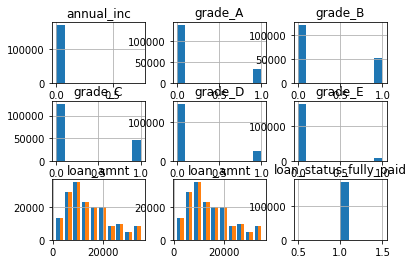

In [29]:
#histogram of variables in small_paid
small_paid.hist()

In [37]:
#creating a new dataset for both types of good and bad loans
#creating a subset of the data for just rows that have paid in full and loan_status_Charged_Off
loan_p_b = lc_clean[(lc_clean['loan_status_fully_paid'] == 1) | (lc_clean['loan_status_Charged_Off'] == 1)]


In [38]:

loan_p_b.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,loan_status_In_Grace_Period,loan_status_Late_(16-30 days),loan_status_Late_(31-120 days),grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
count,0.0,0.0,211907.000000,211907.000000,211907.000000,211907,211907,211907.000000,211907,199642,...,211907.0,211907.0,211907.0,211907.000000,211907.000000,211907.000000,211907.000000,211907.000000,211907.000000,211907.000000
unique,NaN,NaN,NaN,NaN,NaN,2,88,NaN,35,68822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,12.99%,NaN,C2,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,162538,11522,NaN,12503,4028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,14304.615468,14304.615468,14299.824097,NaN,NaN,437.640278,NaN,NaN,...,0.0,0.0,0.0,0.168565,0.275687,0.276702,0.169291,0.078308,0.024846,0.006602
std,NaN,NaN,8355.860226,8355.860226,8352.892323,NaN,NaN,250.166740,NaN,NaN,...,0.0,0.0,0.0,0.374368,0.446861,0.447369,0.375010,0.268656,0.155655,0.080984
min,NaN,NaN,1000.000000,1000.000000,950.000000,NaN,NaN,23.360000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,NaN,NaN,256.590000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,12000.000000,12000.000000,12000.000000,NaN,NaN,377.090000,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,NaN,NaN,575.665000,NaN,NaN,...,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
#I need to define a dataframe with my columns for the predictor variables
loan_p_b_vars=["grade_A", "grade_A"]
#I need to create a train_cols http://blog.yhat.com/posts/logistic-regression-and-python.html
train_cols = loan_p_b_vars[1:]

In [59]:
#logistic regression
logit = sm.Logit(loan_p_b['loan_status_fully_paid'], loan_p_b['grade_A'])

In [60]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.585204
         Iterations 7


In [54]:
#There is a bug, and the first two lines of code take care of it 
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     loan_status_fully_paid   No. Observations:               211907
Model:                              Logit   Df Residuals:                   211906
Method:                               MLE   Df Model:                            0
Date:                    Thu, 19 Apr 2018   Pseudo R-squ.:                  -2.509
Time:                            15:08:42   Log-Likelihood:            -1.2401e+05
converged:                           True   LL-Null:                       -35343.
                                            LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
grade_A        2.8577      0.023    122.374      0.000       2.812       2.903
==============================================================================
"""